In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Paths to the training and testing datasets
train_dir = r'K:/PROJECT/ORGANISED DATASET/train'  
test_dir = r'K:/PROJECT/ORGANISED DATASET/test'

In [3]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Creating data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6185 images belonging to 2 classes.
Found 1724 images belonging to 2 classes.


In [4]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [5]:
from tensorflow.keras.optimizers import Adam

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Training the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator  # Using test data as validation
)

Epoch 1/25
194/194 [==============================] - 303s 2s/step - loss: 0.4084 - accuracy: 0.8464 - val_loss: 0.4223 - val_accuracy: 0.8370
Epoch 2/25
194/194 [==============================] - 302s 2s/step - loss: 0.4084 - accuracy: 0.8477 - val_loss: 0.3730 - val_accuracy: 0.8602
Epoch 3/25
194/194 [==============================] - 303s 2s/step - loss: 0.4091 - accuracy: 0.8417 - val_loss: 0.3993 - val_accuracy: 0.8364
Epoch 4/25
194/194 [==============================] - 303s 2s/step - loss: 0.4040 - accuracy: 0.8440 - val_loss: 0.4065 - val_accuracy: 0.8585
Epoch 5/25
194/194 [==============================] - 303s 2s/step - loss: 0.4067 - accuracy: 0.8428 - val_loss: 0.3623 - val_accuracy: 0.8666
Epoch 6/25
194/194 [==============================] - 304s 2s/step - loss: 0.4080 - accuracy: 0.8443 - val_loss: 0.3596 - val_accuracy: 0.8712
Epoch 7/25
194/194 [==============================] - 304s 2s/step - loss: 0.3914 - accuracy: 0.8524 - val_loss: 0.3734 - val_accuracy: 0.8654

In [8]:
# Save the model
model.save('C:\\Users\\K M SASTRY\\Desktop\\PROJECT\\cnn_model.h5')

C:\Users\K M SASTRY\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

54/54 [==============================] - 33s 616ms/step - loss: 0.7653 - accuracy: 0.8451
Test accuracy: 84.51%


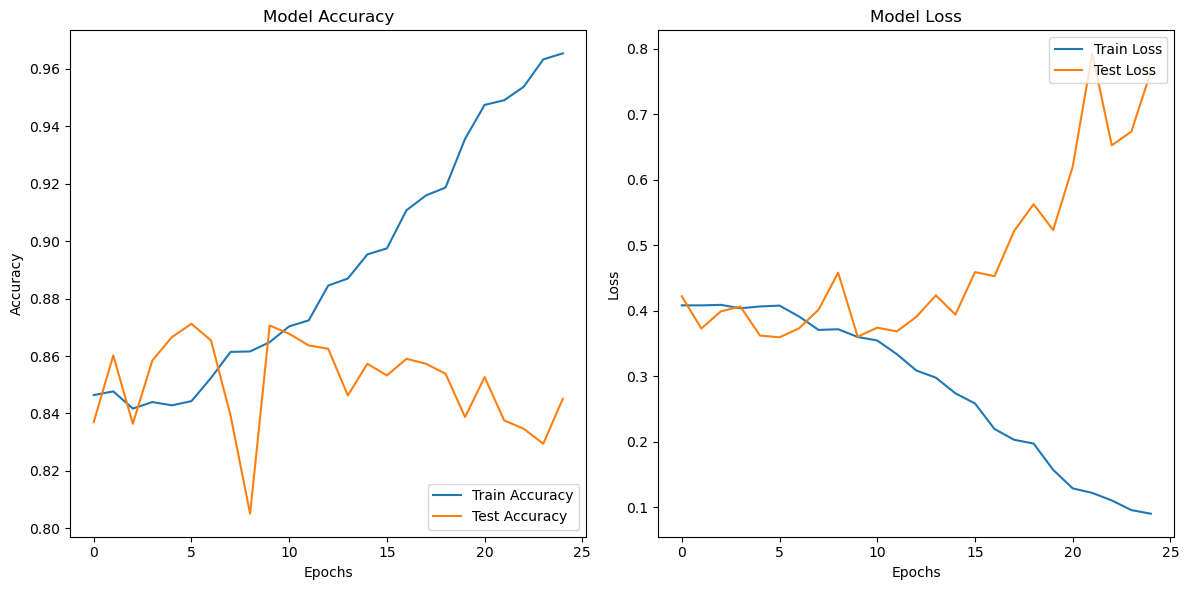

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Use 'val_accuracy' for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  # Use 'val_loss' for validation loss
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r'K:\PROJECT\ORGANISED DATASET\test\BENIGN\adenosis\SOB_B_A_14-22549AB\40X\SOB_B_A-14-22549AB-40-003.png'  

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)  # Convert the image to a NumPy array

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Check the prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Malignant")
else:
    print("The model predicts: Benign")

1/1 [==============================] - 0s 126ms/step
The model predicts: Benign


In [12]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r'K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\ductal_carcinoma\SOB_M_DC_14-2523\200X\SOB_M_DC-14-2523-200-029.png' 

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)  # Convert the image to a NumPy array

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Check the prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Malignant")
else:
    print("The model predicts: Benign")

1/1 [==============================] - 0s 58ms/step
The model predicts: Malignant
